<a href="https://colab.research.google.com/github/Liza-IITP/MachineLearning/blob/main/RidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [110]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)))


0.4399338661568968 55.627840795469155


In [111]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.105)
R.fit(X_train,y_train)
y_pred = R.predict(X_test)
print(r2_score(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)))


0.4522084743503163 55.01488399266955


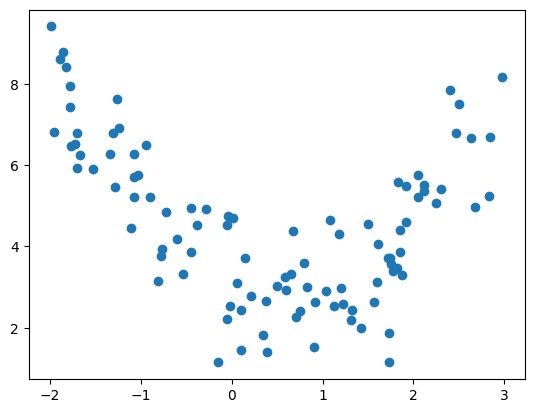

In [112]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.9 * x ** 2 - 1 * x + 3 + np.random.randn(m, 1)

plt.scatter(x, y)
plt.show()

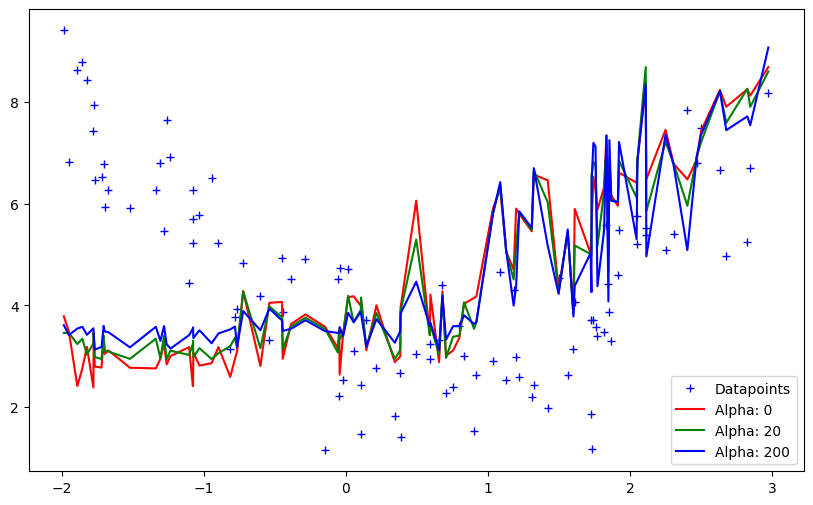

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x, y, alpha)
    plt.plot(sorted(x[:, 0]), preds[np.argsort(y[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

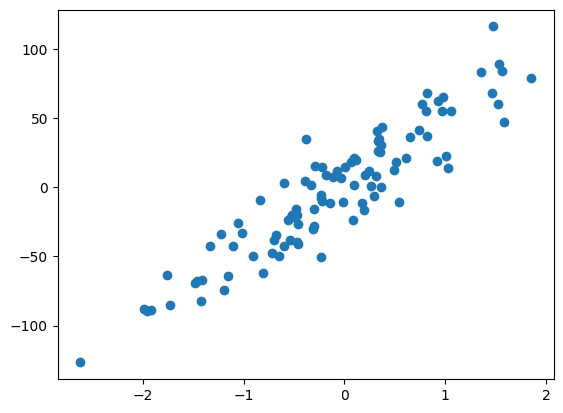

In [114]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1 , noise=20,random_state=42)
plt.scatter(X,y)

[47.13323967] 2.3302306410539453


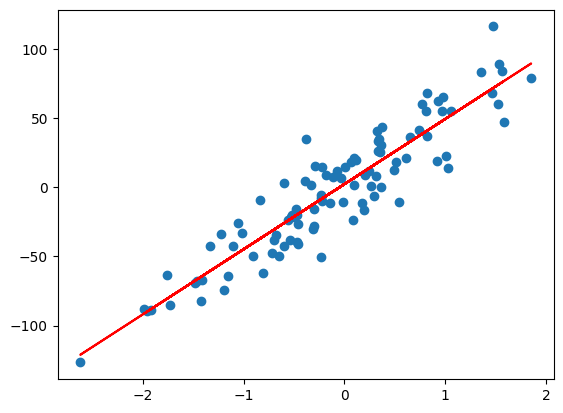

In [115]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
y_pred0 = lr.predict(X)
print(lr.coef_,lr.intercept_)
plt.scatter(X,y)
plt.plot(X,y_pred0,color='red')

[41.9906212] 1.7961876226164746
0.8429977659891696 18.270500160127696


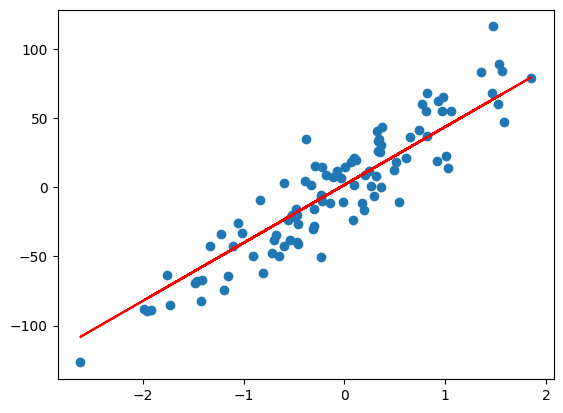

In [116]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
y_pred = rr.predict(X)
print(rr.coef_,rr.intercept_)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')
print(r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred)))

[21.18627364] -0.3642714175995887
0.5946032680938578 29.35875549368393


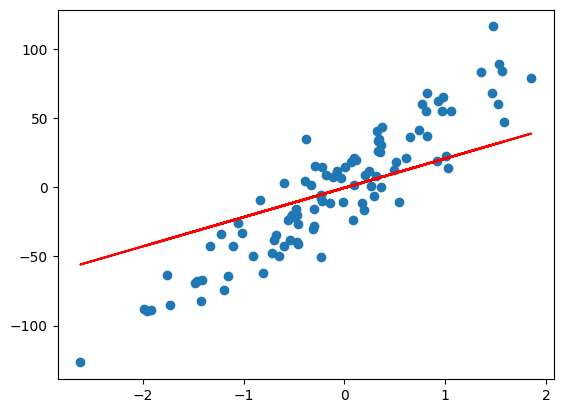

In [117]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
y_pred1 = rr1.predict(X)
print(rr1.coef_,rr1.intercept_)
plt.scatter(X,y)
plt.plot(X,y_pred1,color='red')
print(r2_score(y,y_pred1),np.sqrt(mean_squared_error(y,y_pred1)))

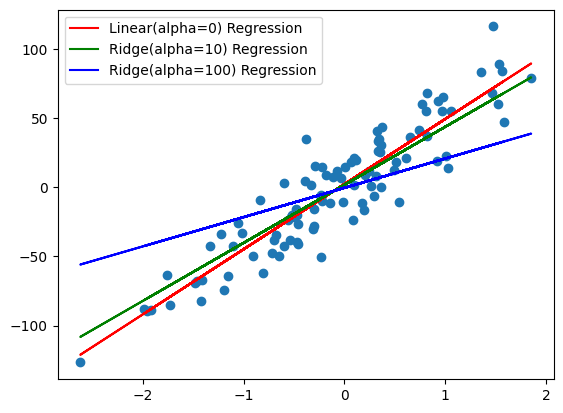

In [118]:
#Plotting all three line on same plot
plt.scatter(X,y)
plt.plot(X,y_pred0,color='red',label='Linear(alpha=0) Regression')
plt.plot(X,y_pred,color='green',label='Ridge(alpha=10) Regression')
plt.plot(X,y_pred1,color='blue',label='Ridge(alpha=100) Regression')
plt.legend()